In [1]:
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.calibration import CalibrationDisplay
import statsmodels.api as sm

#### Read and clean data


In [2]:
df = pd.read_csv('data.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
# Standardization: mean = 0, std = 1
scaler = StandardScaler()
df[['gre', 'gpa']] = scaler.fit_transform(df[['gre', 'gpa']])

# Dummy Encoding
df = pd.get_dummies(df, columns=['rank'], drop_first=True, dtype=int)

df.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,-1.834881,0.517867,0,1,0
1,1,0.361955,0.680604,0,1,0
2,1,1.460372,1.575660,0,0,0
3,1,0.205038,-0.621295,0,0,1
4,0,-0.736463,-1.326491,0,0,1


#### Logistic Regression


In [4]:
X = df[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']]
y = df['admit']

In [5]:
# Train/Test split (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# Add constant term for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Logit model
model = sm.Logit(y_train, X_train_sm)
result = model.fit()

y_pred_prob = result.predict(X_test_sm)
y_pred = (y_pred_prob >= 0.5).astype(int)

result.summary()

Optimization terminated successfully.
         Current function value: 0.424306
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                   52
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Dec 2025   Pseudo R-squ.:                  0.3286
Time:                        12:48:16   Log-Likelihood:                -22.064
converged:                       True   LL-Null:                       -32.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006242
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0285      1.114     -0.026      0.980      -2.213       2.156
gre           -0.3954      0.457     -0.865      0.387      -1.291       0.500
gpa            1.6832      0.644      2.615      0.009       0.421       2.945
rank_2        -0.5116      1.221     -0.419      0.675      -2.905       1.882
rank_3        -1.3981      1.308     -1.069      0.285      -3.961       1.165
rank_4        -2.2446      1.370     -1.638      0.101      -4.930       0.441
==============================================================================
"""

We are using a threshold of 0.5


#### Metrics


In [7]:
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
}

pd.DataFrame([metrics])

,accuracy,precision,recall,f1_score
0,0.73913,0.714286,0.555556,0.625


In [8]:
confusion_matrix(y_test, y_pred)

array([[12,  2],
       [ 4,  5]])

#### ROC


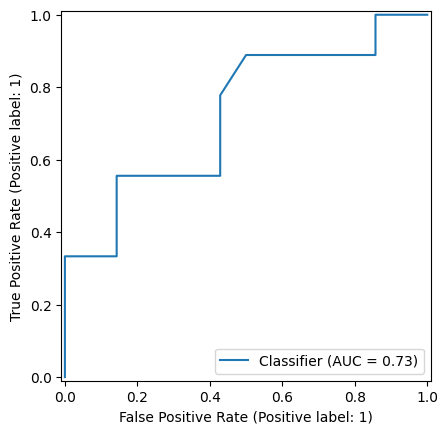

In [9]:
RocCurveDisplay.from_predictions(y_test, y_pred_prob)

#### Calibration plot


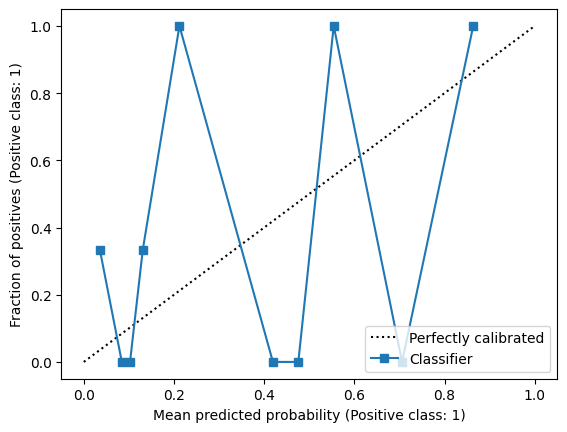

In [10]:
CalibrationDisplay.from_predictions(
    y_test, y_pred_prob, n_bins=10, strategy='quantile'
)